# Quality Assessment
Now it's your turn. Follow [the steps on the platform](https://platform.wbscodingschool.com/courses/data-science/9474/) and use what you've learnt to see how reliable the data is.

In [ ]:
import pandas as pd

Load our cleaned DataFrames

In [ ]:
# orders_cl.csv
url = "https://drive.google.com/file/d/1Tla62vfu__kCqvgypZyVt2S9VuC016yH/view?usp=sharing" 
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orders_cl = pd.read_csv(path)

# orderlines_cl.csv
url = "https://drive.google.com/file/d/1OhtkQS2fwOYdzfd-qPh7im35iLc-L9TA/view?usp=sharing" 
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orderlines_cl = pd.read_csv(path)

# products_cl.csv
url = "https://drive.google.com/file/d/1s7Lai4NSlsYjGEPg1QSOUJobNYVsZBOJ/view?usp=sharing" 
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
products_cl = pd.read_csv(path)

## 1.&nbsp; Define Pandas display format

In [ ]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_rows', 1000)

## 2.&nbsp; Exclude unwanted orders

In [ ]:
# Making copies
orderlines_cl = orderlines_cl.copy()
completed_orders_df = orders_cl.copy()
# Excluding all orders except the ones that are completed
completed_orders_df = completed_orders_df.loc[completed_orders_df['state'].isin(['Completed']), :]
# Merging two df and keeping only orders that are present in both df
completed_orders_df = completed_orders_df.rename(columns={"order_id": "id_order"})
merged_df = completed_orders_df.merge(orderlines_cl, how = 'inner', on = 'id_order')
completed_orders_df = completed_orders_df.loc[completed_orders_df.id_order.isin(merged_df.id_order), :]
orderlines_cl = orderlines_cl.loc[orderlines_cl.id_order.isin(merged_df.id_order), :]
# Changing back the name of the column to order_id
completed_orders_df = completed_orders_df.rename(columns={"id_order": "order_id"})

,id,id_order,product_id,product_quantity,sku,unit_price,date
6,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16
7,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34
8,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11
15,1119134,299556,0,1,CRU0039-A,60.90,2017-01-01 02:20:14
21,1119145,299561,0,1,PEB0015,142.49,2017-01-01 02:38:50
...,...,...,...,...,...,...,...
215889,1649474,525664,0,1,TUC0207,16.52,2018-03-14 11:45:05
215906,1649512,527070,0,2,APP0698,9.99,2018-03-14 11:49:01
215911,1649522,527074,0,2,APP0698,9.99,2018-03-14 11:49:36
215932,1649565,527096,0,3,APP0698,9.99,2018-03-14 11:54:35


## 3.&nbsp; Exclude orders with unknown products


In [ ]:
orderlines_cl.id_order.nunique()

43064

In [ ]:
completed_orders_df.order_id.nunique()

43064

In [ ]:
# products from orderlines that are non existing in products
unknown_products_df = orderlines_cl.loc[~orderlines_cl.sku.isin(products_cl.sku),:]
unknown_products_df.id_order.nunique()

1363

In [ ]:
# deleting non existing products from orderlines
orderlines_cl = orderlines_cl.loc[~orderlines_cl.sku.isin(unknown_products_df.sku),:]
orderlines_cl

,id,id_order,product_id,product_quantity,sku,unit_price,date
6,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16
7,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34
8,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11
15,1119134,299556,0,1,CRU0039-A,60.90,2017-01-01 02:20:14
21,1119145,299561,0,1,PEB0015,142.49,2017-01-01 02:38:50
...,...,...,...,...,...,...,...
215889,1649474,525664,0,1,TUC0207,16.52,2018-03-14 11:45:05
215906,1649512,527070,0,2,APP0698,9.99,2018-03-14 11:49:01
215911,1649522,527074,0,2,APP0698,9.99,2018-03-14 11:49:36
215932,1649565,527096,0,3,APP0698,9.99,2018-03-14 11:54:35


In [ ]:
# making a list of orders that should be deleted from both orderlines and orders
order_tobe_deleted = unknown_products_df['id_order'].tolist()
# excluding them from orders
completed_orders_df = completed_orders_df.loc[~completed_orders_df.order_id.isin(order_tobe_deleted),:]
# deleting orders from orderlines
orderlines_cl = orderlines_cl.loc[~orderlines_cl.id_order.isin(order_tobe_deleted),:]
completed_orders_df

,order_id,created_date,total_paid,state
1,241423,2017-11-06 13:10:02,136.15,Completed
2,242832,2017-12-31 17:40:03,15.76,Completed
3,243330,2017-02-16 10:59:38,84.98,Completed
5,245275,2017-06-28 11:35:37,149.00,Completed
6,245595,2017-01-21 12:52:47,112.97,Completed
...,...,...,...,...
226544,527042,2018-03-14 11:47:50,18.98,Completed
226572,527070,2018-03-14 11:50:48,24.97,Completed
226576,527074,2018-03-14 11:51:42,24.97,Completed
226598,527096,2018-03-14 11:58:40,34.96,Completed


In [ ]:
len(list(completed_orders_df["order_id"].unique())), len(list(orderlines_cl["id_order"].unique()))

(41701, 41701)

## 4.&nbsp; Explore the revenue from different tables

#### Step 1:
Create the `unit_price_total` as `orderlines.unit_price` * `orderlines.product_quantity`

In [ ]:
orderlines_cl['unit_price_total'] = orderlines_cl.unit_price * orderlines_cl.product_quantity
orderlines_cl

<ipython-input-11-f6d079bf7f44>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orderlines_cl['unit_price_total'] = orderlines_cl.unit_price * orderlines_cl.product_quantity


,id,id_order,product_id,product_quantity,sku,unit_price,date,unit_price_total
6,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,47.49
7,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34,18.99
8,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11,72.19
15,1119134,299556,0,1,CRU0039-A,60.90,2017-01-01 02:20:14,60.90
21,1119145,299561,0,1,PEB0015,142.49,2017-01-01 02:38:50,142.49
...,...,...,...,...,...,...,...,...
215889,1649474,525664,0,1,TUC0207,16.52,2018-03-14 11:45:05,16.52
215906,1649512,527070,0,2,APP0698,9.99,2018-03-14 11:49:01,19.98
215911,1649522,527074,0,2,APP0698,9.99,2018-03-14 11:49:36,19.98
215932,1649565,527096,0,3,APP0698,9.99,2018-03-14 11:54:35,29.97


#### Step 2: 
Group by `order_id`, summarising by the sum of `unit_price_total`

In [ ]:
orders_group = orderlines_cl.groupby('id_order')['unit_price_total'].sum()

### What is the average difference between `total_paid` and `unit_price_total`?

In [ ]:
products_cl.shape

(9992, 6)

In [ ]:
orderlines_cl.shape

(54324, 8)

In [ ]:
completed_orders_df.shape


(41701, 4)

In [ ]:
merged_df1 = completed_orders_df.merge(orders_group, how = 'inner', left_on = 'order_id', right_on = 'id_order')
merged_df1['avg_difference'] = merged_df1['total_paid'] - merged_df1['unit_price_total']
merged_df1.avg_difference.mean().round(2)

4.47

### What is the distribution of these differences?

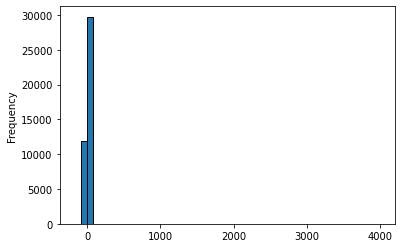

In [ ]:
merged_df1['avg_difference'].plot(bins = 50, kind='hist', edgecolor = 'black')

### Can all the differences be explained by shipping costs? If not, what are other plausible explanations?

In [ ]:
merged_df1['avg_difference'].describe()

count   41701.00
mean        4.47
std        26.05
min      -165.00
25%         0.00
50%         4.99
75%         6.99
max      3984.99
Name: avg_difference, dtype: float64

### If there are differences that you can’t explain: what should you do with these orders?

There's a rule of thumb, that anything: 
+ lower than the 25% quartile - (1.5 x interquartile range), or 
+ higher than the 75% quartile + (1.5 x interquartile range) 

is an outlier. Let's use this rule to try and exclude any corrupted data.

In [ ]:
# calculate the quartiles
Q1 = merged_df1["avg_difference"].quantile(0.25)
Q3 = merged_df1["avg_difference"].quantile(0.75)

# calculate the interquartile range
IQR = Q3-Q1

# filter the DataFrame to include only "non-outliers"
diff_no_outliers_df = merged_df1.loc[(merged_df1["avg_difference"] >= (Q1 - 1.5*IQR)) & (merged_df1["avg_difference"] <= (Q3 + 1.5*IQR))]

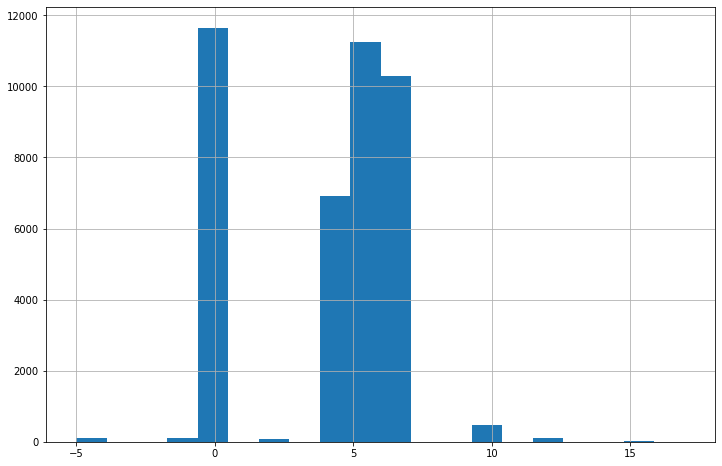

In [ ]:
diff_no_outliers_df.avg_difference.hist(bins= 20, figsize=(12,8));

In [ ]:
# Remove extreme outliers from completed_orders
normal_diff_list = list(diff_no_outliers_df["order_id"])

orders_qu = completed_orders_df.loc[completed_orders_df["order_id"].isin(normal_diff_list), :]
orderlines_qu = orderlines_cl.loc[orderlines_cl["id_order"].isin(normal_diff_list), :]
# Checking if the length is the same
len(orders_qu["order_id"].unique()), len(orderlines_qu["id_order"].unique())

(40985, 40985)

## 5.&nbsp; Become confident about your dataset

Do not forget to download your quality controlled DataFrames

In [ ]:
from google.colab import files

orders_qu.to_csv("orders_qu.csv", index=False)
files.download("orders_qu.csv")

orderlines_qu.to_csv("orderlines_qu.csv", index=False)
files.download("orderlines_qu.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>